# An Introduction to Machine Learning
---
![](images/tweet.png)
![](images/googletrend.png)
<sub><sup>Source: https://twitter.com/fchollet</sup></sub>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

dataframe = pd.read_csv("data/slr03.csv")
data = dataframe.values[:,:]
sand_granules_diameter = data[:,0]
beach_slope = data[:,1]

def plot_data(axis):
    global sand_granules_diameter, beach_slope
    axis.set_xlabel("sand granules diameter [mm]")
    axis.set_ylabel("beach slope [$^\circ$]")
    axis.plot(sand_granules_diameter, beach_slope, "ko")    
    
def plot_regression(axis, should_plot_error, a = 1, relative_regression_error_a = "NA"):
    global sand_granules_diameter, beach_slope
    if relative_regression_error_a is not "NA":
        a, b = np.polyfit(sand_granules_diameter, beach_slope, 1)
        a = (1 + relative_regression_error_a)*a
    beach_slope_estimated = [a*i + b for i in sand_granules_diameter]
    linear_equation_as_string = "$\hat{y}$ = " + "{:.2f}".format(a) +" * $x$ " + "{:.2f}".format(b)
    axis.text(sand_granules_diameter[-1], b, linear_equation_as_string, color="blue", ha="right", va="bottom", size=18)
    quadratic_error = 0
    if should_plot_error:
            for i in range(0,len(sand_granules_diameter)):
                axis.plot([sand_granules_diameter[i],sand_granules_diameter[i]], [beach_slope[i],beach_slope_estimated[i]], "r")
                quadratic_error = calculate_quadratic_error(y=beach_slope, y_estimated=beach_slope_estimated)
                quadratic_error_equation_as_string = "$e = \sum_{i=0}^n (y_i - \hat{y}_i)^2$ = " + "{:.2f}".format(quadratic_error)
                axis.text(sand_granules_diameter[-1], b+1, quadratic_error_equation_as_string, color="red", ha="right", va="bottom", size=18)
    sand_granules_diameter_temp = np.insert(sand_granules_diameter,0,0)   
    beach_slope_estimated = np.insert(beach_slope_estimated,0,b)
    axis.plot(sand_granules_diameter_temp, beach_slope_estimated, "b")
    return (a, quadratic_error)
    
def calculate_quadratic_error(y, y_estimated):
    return np.sum((y-y_estimated)**2)

def plot_error_graph(axis):
    global sand_granules_diameter, beach_slope
    axis.set_xlabel("line slope $a$ [$^\circ$/mm]")
    axis.set_ylabel("sum of squared errors $e$ [$^{\circ 2}$]")
    a,b = np.polyfit(sand_granules_diameter, beach_slope, 1)
    a_s = []
    quadratic_errors = []
    for i in range(-35,36):
        a_temp = ((100.0+float(i))/100.0) * a
        beach_slope_estimated = [a_temp*i + b for i in sand_granules_diameter]
        quadratic_error = calculate_quadratic_error(y=beach_slope, y_estimated=beach_slope_estimated)
        a_s.append(a_temp)
        quadratic_errors.append(quadratic_error)
    axis.plot(a_s, quadratic_errors, "gray")
    c, d, e = np.polyfit(a_s, quadratic_errors, 2)
    return (c, d, e)
    
def plot_error_point(axis, a, quadratic_error):
    y_lim_bottom = axis.get_ylim()[0]
    x_lim_bottom = axis.get_xlim()[0]
    axis.plot([a, a], [y_lim_bottom, quadratic_error], "b")
    axis.plot([x_lim_bottom, a], [quadratic_error, quadratic_error], "r")
    axis.plot(a, quadratic_error, "o", color="gray")
    axis.set_ylim(y_lim_bottom, axis.get_ylim()[1])
    axis.set_xlim(x_lim_bottom, 37)
    
def plot_gradient_of_parabola(axis, a, quadratic_error, c, d):
    x_lim_bottom = axis.get_xlim()[0]
    gradient = 2*c*a + d
    axis.annotate("", xy=(a + gradient, quadratic_error), xycoords='data', xytext=(a, quadratic_error), textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="gray"))
    axis.set_xlim(x_lim_bottom, 37)
    

In [2]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_data(
    axis=ax
)
fig.savefig("images/plot1.png")

# How steap is your shore?
---
![](images/plot1.png)
<sub><sup>Source: http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/</sup></sub>

In [3]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_regression(
    axis=ax,
    relative_regression_error_a=0.0,
    should_plot_error=False
)
plot_data(
    axis=ax
)
fig.savefig("images/plot2.png")

# How steap is your shore?
---
![](images/plot2.png)

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_regression(
    axis=ax,
    relative_regression_error_a=0.0,
    should_plot_error=True
)
plot_data(
    axis=ax
)
fig.savefig("images/plot3.png")

# How steap is your shore?
---
![](images/plot3.png) 

In [5]:
relative_regression_error_a=0.3
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
a, quadratic_error = plot_regression(
    axis=ax1,
    relative_regression_error_a=relative_regression_error_a,
    should_plot_error=True
)
plot_data(
    axis=ax1
)
c, d, e = plot_error_graph(
    axis=ax2
)
plot_error_point(
    axis=ax2,
    a=a,
    quadratic_error=quadratic_error
)
fig.savefig("images/plot4.png")

# Always go downhill
---
![](images/plot4.png) 

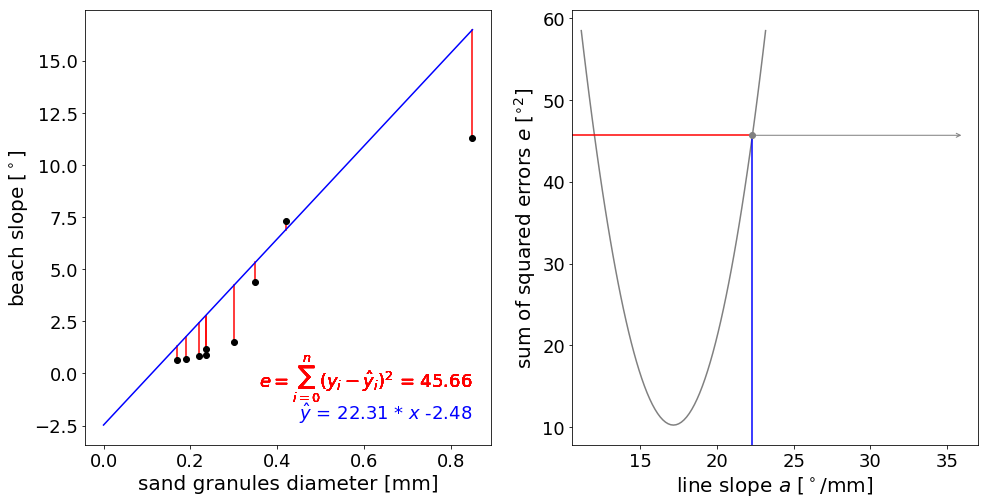

In [6]:
%matplotlib inline
relative_regression_error_a=0.3
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
a, quadratic_error = plot_regression(
    axis=ax1,
    relative_regression_error_a=relative_regression_error_a,
    should_plot_error=True
)
plot_data(
    axis=ax1
)
c, d, e = plot_error_graph(
    axis=ax2
)
plot_gradient_of_parabola(
    axis=ax2,
    a=a,
    quadratic_error=quadratic_error,
    c=c,
    d=d
)
plot_error_point(
    axis=ax2,
    a=a,
    quadratic_error=quadratic_error
)
fig.savefig("images/plot5.png")

# Always go downhill
---
![](images/plot5.png) 